Тот же самый пример из advanced версии только теперь я подгрузил все в pypi

In [1]:
!pip install pytorch_training_template

In [2]:
import torch.nn.functional as F
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch

import pytorch_training_template as py_pt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 32, kernel_size=3)
        self.fc = nn.Linear(26*26*32, 10)

    def forward(self, x):
        x = F.relu(self.conv(x))
        x = x.view(x.size(0), -1)
        return self.fc(x)

model = SimpleCNN().to(device)

transform = transforms.ToTensor()
train_data = datasets.MNIST(root=".", train=True, transform=transform, download=True)
val_data = datasets.MNIST(root=".", train=False, transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

train_loss_log, train_metric_log, val_loss_log, val_metric_log =py_pt.train(
  model=model,
  optimizer=optimizer,
  n_epochs=5,
  train_loader=train_loader,
  val_loader=val_loader,
  device=device,
  loss_fn=nn.CrossEntropyLoss(),
  metric_fn=py_pt.accuracy,
  checkpoint_path="mnist_best.pt",
  resume=False,
  metric="val_metric",
  save_last=True, # Всегда сохраняет последнюю модельку
  save_every=2, # Сохраняет каждую n-ую эпоху (сейчас каждую вторую)
  use_amp=True # Вот посмотрим как оно работает
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.65MB/s]
/usr/local/lib/python3.12/dist-packages/pytorch_training_template/device.py:17: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  return torch.cuda.amp.GradScaler()



Epoch 1/5


 train loss: 0.2144, train acc: 0.9375
 val loss: 0.0968, val acc: 0.9708
Saved new best model (val_metric=0.9708)

Epoch 2/5


 train loss: 0.0759, train acc: 0.9774
 val loss: 0.0738, val acc: 0.9768
Saved new best model (val_metric=0.9768)

Epoch 3/5


 train loss: 0.0526, train acc: 0.9848
 val loss: 0.0695, val acc: 0.9783
Saved new best model (val_metric=0.9783)

Epoch 4/5


 train loss: 0.0412, train acc: 0.9873
 val loss: 0.0632, val acc: 0.9803
Saved new best model (val_metric=0.9803)

Epoch 5/5


 train loss: 0.0314, train acc: 0.9902
 val loss: 0.0618, val acc: 0.9809
Saved new best model (val_metric=0.9809)


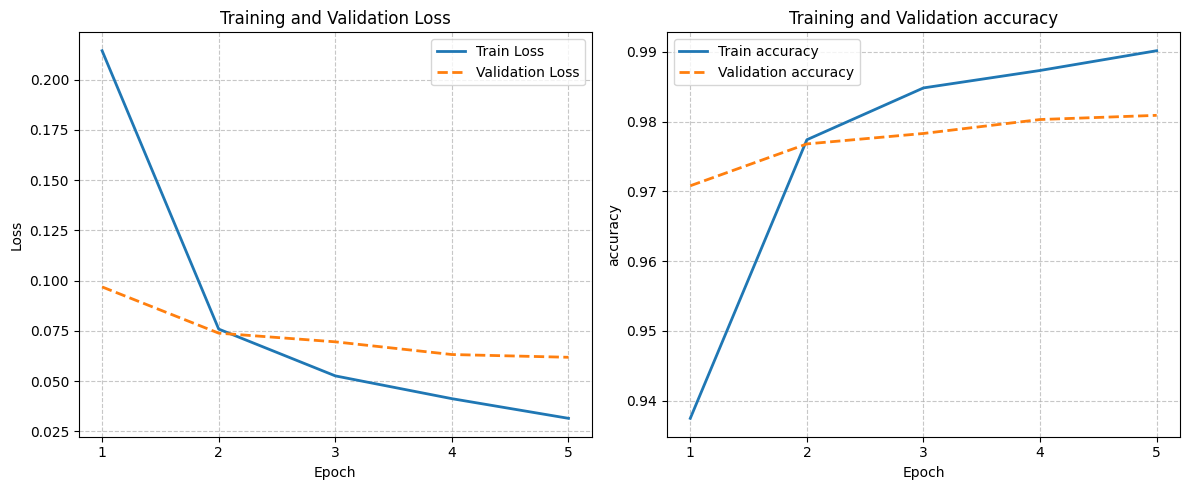

In [3]:
py_pt.plot_reses(train_loss_log, train_metric_log, val_loss_log, val_metric_log, metric_name='accuracy')